In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *

In [2]:
T = 25
I = 20   # number of locations
J = 10   # number of species
K = 3    # number of latent factors

In [3]:
lmbda = npr.randn(J,K)
alpha = npr.randn(J)
c = 0
phi = 0.5
logsigmasq = 0
x_0 = npr.randn(I,K)

theta = [alpha, lmbda, c, phi, logsigmasq]
Y, X = simulate_data(x_0, T, J, theta)

In [4]:
def f1(n_particles) :
    return block_pf(Y, x_0, n_particles, theta, calc_grad=True)
def f2(n_particles) :
    return bootstrap_PF_grad(x_0, n_particles, theta, Y, calc_grad=True)

n_particles = 1_000
rep = 1000

pool = mp.Pool(10)
results1 = pool.map(f1, [n_particles for n_particles in [n_particles]*rep])
results2 = pool.map(f2, [n_particles for n_particles in [n_particles]*rep])
pool.close()

logNC = np.zeros((rep,2))
alpha_grad = np.zeros((rep,2,J))
lmbda_grad = np.zeros((rep,2,J,K))
c_grad = np.zeros((rep,2))
phi_grad = np.zeros((rep,2))
logsigmasq_grad = np.zeros((rep,2))

for r in range(rep) :
    alpha_grad[r,0], lmbda_grad[r,0], c_grad[r,0], phi_grad[r,0], logsigmasq_grad[r,0] = results1[r][1][:]
    alpha_grad[r,1], lmbda_grad[r,1], c_grad[r,1], phi_grad[r,1], logsigmasq_grad[r,1] = results2[r][1][:]
    logNC[r,0], logNC[r,1] = results1[r][0], results2[r][0]

In [5]:
np.mean(logNC,0)

array([-4038.82316579, -4280.07584349])

In [6]:
np.var(logNC,0)

array([ 410.96816669, 2497.20956229])

In [9]:
print(np.std(c_grad,0))
print(np.std(lmbda_grad,0))
print(np.std(phi_grad,0))
print(np.std(logsigmasq_grad,0))

[ 7.60406677 33.00066336]
[[[ 7.67214168  7.89160039  6.86553293]
  [ 8.72019056  8.76156772  7.81139023]
  [ 6.83955723  6.72119467  6.06613229]
  [ 4.97058784  5.40031735  4.75846344]
  [ 6.98412465  6.75198973  6.17081996]
  [ 6.22806712  6.1680913   5.5798064 ]
  [ 6.25663223  6.09188505  5.71907828]
  [ 4.21272545  4.01761066  3.87048863]
  [ 7.88507505  7.86292638  6.98545776]
  [ 6.73112375  6.9540601   6.0811405 ]]

 [[28.63348901 28.52809549 27.23829453]
  [33.11338872 33.48791184 31.29732037]
  [24.90011778 25.17014617 24.82465881]
  [18.42133001 18.5465374  18.28063931]
  [25.66420316 25.1417399  24.63808518]
  [21.85383972 21.87825636 21.60388805]
  [22.42471972 21.59183868 21.07885495]
  [14.38679239 14.36641679 14.41711782]
  [30.08667871 29.91420073 29.50412729]
  [24.63010879 24.53963932 24.2763335 ]]]
[38.63820598 70.41565889]
[12.33858575 25.18442888]


In [8]:
print(np.mean(c_grad,0))
print(np.mean(lmbda_grad,0))
print(np.mean(phi_grad,0))
print(np.mean(logsigmasq_grad,0))

[167.25301673   4.84151891]
[[[-180.21496336 -130.77985243  134.82400373]
  [-300.38597622   16.79930834   27.03930288]
  [-144.83202458  200.95086309  104.98083303]
  [-223.29552057   39.97221456  202.79235604]
  [ -21.16673834  130.82874509  -47.20462179]
  [-136.20934042  159.7564703   -87.00254737]
  [-166.98577695    4.60138076 -203.48442738]
  [ -98.57783608  113.53763944  -90.59093147]
  [-286.89614424  197.17691284   22.2334617 ]
  [-200.2159464   -33.108026     28.48098087]]

 [[  -7.51639921  -29.32801208   30.13932908]
  [  -9.46839529  -11.8373004    18.06001267]
  [  10.34518572   21.61450452   21.15223673]
  [ -20.06940379   -6.78475559   36.61260559]
  [  29.28067141   19.20410893    1.31420296]
  [   7.10390166   17.77597788   -3.15225854]
  [  -6.61387302   -6.86397386  -19.25716459]
  [   1.75771104   10.50218464   -9.0164809 ]
  [  -4.34838309   13.76439304   16.75596578]
  [  -6.30836069  -12.51741274   14.89878397]]]
[-2389.83801838 -1313.86999009]
[968.69327976 70

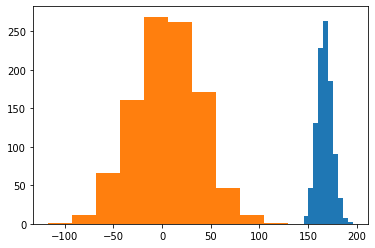

In [13]:
plt.hist(c_grad[:,0])
plt.hist(c_grad[:,1]);

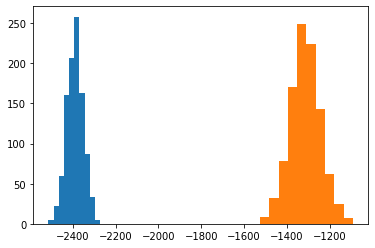

In [14]:
plt.hist(phi_grad[:,0])
plt.hist(phi_grad[:,1]);

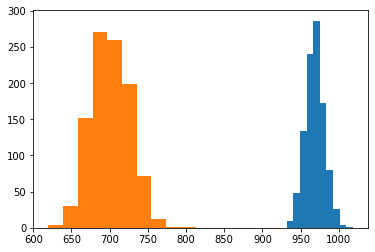

In [15]:
plt.hist(logsigmasq_grad[:,0])
plt.hist(logsigmasq_grad[:,1]);